**A data science experiment using data from the KDD 2010 Educational Data Mining Challenge**

The aim of this IPython Notebook is to give you a sense of the dataset.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import random

In [2]:
# Get the data:
train_filepath = 'data/train.csv'
traindata = pd.read_table(train_filepath)
test_filepath = 'data/test.csv'

= pd.read_table(test_filepath)

In [6]:
testdata.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,10039,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP01,1,2/300*X = 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10482,52vEY7f17k,"Unit CTA1_06, Section CTA1_06-3",FOR05,1,xScale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Changing axis intervals,28
2,11024,52vEY7f17k,"Unit ES_03, Section ES_03-6",EG52,1,2.9 = -2x+3.7+x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[SkillRule: Consolidate vars, no coeff; CLT]",27
3,11476,52vEY7f17k,"Unit CTA1_08, Section CTA1_08-3",REAL10,1,yScale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Changing axis intervals,65
4,11948,52vEY7f17k,"Unit ES_04, Section ES_04-12",EG58,7,xR2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print(traindata.columns)
print(testdata.columns)

Index(['Row', 'Anon Student Id', 'Problem Hierarchy', 'Problem Name',
       'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')
Index(['Row', 'Anon Student Id', 'Problem Hierarchy', 'Problem Name',
       'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')


In [34]:
# 36,38,39,40, 41,
traindata[50:100]

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
50,9988,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP03,1,R3C2,2005-09-09 12:50:21.0,2005-09-09 12:50:31.0,2005-09-09 12:50:31.0,2005-09-09 12:50:31.0,10.0,10.0,NaN,1,0,0,1,"Using small numbers~~Write expression, positiv...",11~~5~~11
51,9989,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP03,1,R4C1,2005-09-09 12:50:31.0,2005-09-09 12:50:34.0,NaN,2005-09-09 12:50:34.0,3.0,NaN,3.0,0,1,0,0,"Using small numbers~~Find X, Simple~~Using dif...",12~~4~~12
52,9990,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP03,1,R4C2,2005-09-09 12:50:34.0,2005-09-09 12:50:42.0,2005-09-09 12:50:42.0,2005-09-09 12:50:42.0,8.0,8.0,NaN,1,0,0,1,Entering a given,17
53,9991,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP03,1,R5C2,2005-09-09 12:50:42.0,2005-09-09 12:50:48.0,NaN,2005-09-09 12:50:51.0,9.0,NaN,9.0,0,2,0,0,"Find Y, Simple~~Using small numbers~~Using dif...",4~~13~~13
54,9992,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP03,1,R5C1,2005-09-09 12:50:51.0,2005-09-09 12:50:54.0,2005-09-09 12:50:54.0,2005-09-09 12:50:54.0,3.0,3.0,NaN,1,0,0,1,Entering a given,18
55,9993,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP03,1,R6C2,2005-09-09 12:50:54.0,2005-09-09 12:51:13.0,2005-09-09 12:51:13.0,2005-09-09 12:51:13.0,19.0,19.0,NaN,1,0,0,1,Entering a given,19
56,9994,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP03,1,R7C2,2005-09-09 12:51:13.0,2005-09-09 12:51:20.0,NaN,2005-09-09 12:51:21.0,8.0,NaN,8.0,0,2,0,0,"Find Y, Simple~~Using small numbers~~Using dif...",5~~14~~14
57,9995,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP03,1,R7C1,2005-09-09 12:51:21.0,2005-09-09 12:51:23.0,2005-09-09 12:51:23.0,2005-09-09 12:51:23.0,2.0,2.0,NaN,1,0,0,1,Entering a given,20
58,9996,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP03,2,ValidEquations,2005-09-14 12:15:47.0,2005-09-14 12:18:14.0,2005-09-14 12:18:14.0,2005-09-14 12:25:39.0,165.0,165.0,NaN,1,0,0,5,NaN,NaN
59,9997,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP03,2,150 = 1/5*X,2005-09-14 12:18:15.0,2005-09-14 12:18:20.0,2005-09-14 12:18:20.0,2005-09-14 12:18:20.0,5.0,5.0,NaN,1,0,0,1,NaN,NaN


In [74]:
# Inspect some of the training data
set(testdata['Row'])

{163843,
 1052675,
 485384,
 921610,
 38923,
 235536,
 247824,
 538640,
 778256,
 88089,
 196634,
 962585,
 731164,
 1054749,
 673822,
 1071133,
 1073178,
 575522,
 329763,
 626724,
 608301,
 706607,
 577584,
 854064,
 954416,
 987187,
 813109,
 499766,
 1042485,
 833593,
 940090,
 872514,
 512069,
 307272,
 399434,
 286795,
 696396,
 798796,
 606288,
 733265,
 968785,
 403540,
 47189,
 45142,
 96342,
 368725,
 471127,
 1008702,
 104542,
 317534,
 313440,
 747616,
 890978,
 1005662,
 837733,
 159846,
 391272,
 1075308,
 362605,
 241775,
 65648,
 458863,
 704623,
 86131,
 1048689,
 942197,
 213110,
 417910,
 600182,
 950393,
 1075314,
 729214,
 542847,
 1030273,
 850054,
 936070,
 1009799,
 510093,
 546957,
 882831,
 90259,
 833684,
 389270,
 309399,
 598169,
 424090,
 100512,
 827553,
 1050786,
 422054,
 473257,
 919724,
 858289,
 700596,
 284856,
 311481,
 415930,
 884921,
 929980,
 999608,
 88254,
 313535,
 1003712,
 1015993,
 1020097,
 823491,
 420038,
 872646,
 942282,
 1073355,
 5

In [39]:
for i in set(testdata['Problem Name']):
    if i in set(traindata['Problem Name']):
        continue
    print (i)

BH1T18
EG-FACTOR33


In [44]:
# problem have all been appear in nan test
# testdata[testdata['Problem Name']=='BH1T18']
# testdata[testdata['Problem Name']=='EG-FACTOR33']

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
107,100512,879eYkR2Wu,"Unit CTA1_27, Section CTA1_27-1",BH1T18,1,R1C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [64]:
testdata[testdata['Problem Name']=='1PTB05']

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
784,849774,pg8uPBYamG,"Unit CTA1_20, Section CTA1_20-1",1PTB05,1,R3C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Define Variable,28


In [65]:
traindata[traindata['Problem Name']=='1PTB05']['Anon Student Id']=='pg8uPBYamG'

11432     False
11433     False
11434     False
11435     False
11436     False
          ...  
145752    False
145753    False
175294     True
175295     True
175296     True
Name: Anon Student Id, Length: 188, dtype: bool

In [62]:
traindata[traindata['Anon Student Id']=='88Uhb8760x']['Problem Name']=='EG-FACTOR19'

66162    False
66163    False
66164    False
66165    False
66166    False
         ...  
70977    False
70978     True
70979     True
70980     True
70981     True
Name: Problem Name, Length: 4820, dtype: bool

In [68]:
traindata[175294 :175299]

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
175294,849771,pg8uPBYamG,"Unit CTA1_20, Section CTA1_20-1",1PTB05,1,R1C1,2006-04-24 13:44:58.0,2006-04-24 13:45:43.0,2006-04-24 13:45:43.0,2006-04-24 13:45:43.0,45.0,45.0,NaN,1,0,0,1,NaN,NaN
175295,849772,pg8uPBYamG,"Unit CTA1_20, Section CTA1_20-1",1PTB05,1,R1C2,2006-04-24 13:45:43.0,2006-04-24 13:46:21.0,2006-04-24 13:46:21.0,2006-04-24 13:46:21.0,38.0,38.0,NaN,1,0,0,1,NaN,NaN
175296,849773,pg8uPBYamG,"Unit CTA1_20, Section CTA1_20-1",1PTB05,1,R2C1,2006-04-24 13:46:21.0,2006-04-24 13:46:31.0,2006-04-24 13:46:31.0,2006-04-24 13:46:31.0,10.0,10.0,NaN,1,0,0,1,Identifying units,38
175297,849778,pg8uPBYamG,"Unit CTA1_24, Section CTA1_24-1",PERCENT07,1,R1C1,2006-04-24 13:53:07.0,2006-04-24 13:53:49.0,2006-04-24 13:53:49.0,2006-04-24 13:53:49.0,42.0,42.0,NaN,1,0,0,1,NaN,NaN
175298,849779,pg8uPBYamG,"Unit CTA1_24, Section CTA1_24-1",PERCENT07,1,R1C2,2006-04-24 13:53:49.0,2006-04-24 13:54:12.0,2006-04-24 13:54:12.0,2006-04-24 13:54:12.0,23.0,23.0,NaN,1,0,0,1,NaN,NaN


In [73]:
testdata[testdata['Row']==849777]

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)


In [7]:
traindata.shape

(232744, 19)

In [9]:
traindata['Step Name']

0         R1C1
1         R1C2
2         R3C1
3         R3C2
4         R4C1
          ... 
232739    R5C1
232740    R1C2
232741    R2C2
232742    R3C2
232743    R6C2
Name: Step Name, Length: 232744, dtype: object

In [15]:
ip = 0
for item in testdata['Correct First Attempt']:
    if item == 0 or item == 1:
        ip += 1
    
print(ip)

666


In [211]:
len(np.unique(testdata['Problem Hierarchy']))

111

In [209]:
232744+1140

233884

In [44]:
target = traindata['Correct First Attempt']

In [46]:
data = traindata.drop(["Correct First Attempt"], axis = 1)

In [97]:
student_id = np.unique(data['Anon Student Id'])
prob_hierarchy = np.unique(data['Problem Hierarchy'])
prob_name = np.unique(data['Problem Name'])
# kc = np.unique(data['KC(Default)'])

dic_student_id = {student_id[i] : i for i in range(len(student_id))}
dic_prob_hierarchy = {prob_hierarchy[i] : i for i in range(len(prob_hierarchy))}
dic_prob_name = {prob_name[i] : i for i in range(len(prob_name))}
# dic_kc = {kc[i] : i for i in range(len(kc))}
dic_column_name = {data.columns[i] : i for i in range(len(data.columns))}

dic_column_name

{'Row': 0,
 'Anon Student Id': 1,
 'Problem Hierarchy': 2,
 'Problem Name': 3,
 'Problem View': 4,
 'Step Name': 5,
 'Step Start Time': 6,
 'First Transaction Time': 7,
 'Correct Transaction Time': 8,
 'Step End Time': 9,
 'Step Duration (sec)': 10,
 'Correct Step Duration (sec)': 11,
 'Error Step Duration (sec)': 12,
 'Incorrects': 13,
 'Hints': 14,
 'Corrects': 15,
 'KC(Default)': 16,
 'Opportunity(Default)': 17}

In [86]:
dealt_data = data.values
print(dealt_data.shape)

(232744, 18)


In [89]:
# problem name: str -> index
for row in dealt_data:
    row[column_name['Problem Name']] = dic_prob_name[row[column_name['Problem Name']]]


[9941 '52vEY7f17k' 'Unit CTA1_13, Section CTA1_13-1' 'PROP04' 1 'R3C2'
 '2005-09-09 12:25:40.0' '2005-09-09 12:25:51.0' '2005-09-09 12:27:24.0'
 '2005-09-09 12:27:24.0' 104.0 nan 104.0 4 9 1
 'Using small numbers~~Write expression, positive slope~~Using difficult numbers'
 '1~~1~~1']


array([9938, '52vEY7f17k', 'Unit CTA1_13, Section CTA1_13-1', 759, 1,
       'R1C1', '2005-09-09 12:23:34.0', '2005-09-09 12:24:07.0',
       '2005-09-09 12:24:07.0', '2005-09-09 12:24:07.0', 33.0, 33.0, nan,
       0, 0, 1, nan, nan], dtype=object)

In [64]:
student = data[(data['Anon Student Id'] == '52vEY7f17k')]


{'BH1T04': 0,
 'BH1T20': 1,
 'BH1T40': 2,
 'BH1T44': 3,
 'DEC02': 4,
 'DEC04': 5,
 'DEMO_8': 6,
 'DIST02_SP': 7,
 'DIST03_SP': 8,
 'DIST04_SP': 9,
 'DIST05_SP': 10,
 'DIST06_SP': 11,
 'DIST09_SP': 12,
 'DIST10_SP': 13,
 'DIST11_SP': 14,
 'DISTFB01_SP': 15,
 'DISTFB03_SP': 16,
 'DISTFB04_SP': 17,
 'DISTFB05_SP': 18,
 'DISTFB06_SP': 19,
 'DISTFB07_SP': 20,
 'DISTFB08_SP': 21,
 'EG3-FIXED': 22,
 'EG4-FIXED': 23,
 'EG40': 24,
 'EG45': 25,
 'EG45A': 26,
 'EG46': 27,
 'EG46A': 28,
 'EG47': 29,
 'EG47A': 30,
 'EG48': 31,
 'EG48A': 32,
 'EG49': 33,
 'EG49A': 34,
 'EG50': 35,
 'EG50A': 36,
 'EG51': 37,
 'EG51A': 38,
 'EG52': 39,
 'EG52A': 40,
 'EG53': 41,
 'EG53A': 42,
 'EG54': 43,
 'EG55': 44,
 'EG55A': 45,
 'EG56': 46,
 'EG56A': 47,
 'EG57': 48,
 'EG57A': 49,
 'EG58': 50,
 'EG58A': 51,
 'FEB02': 52,
 'FEB03': 53,
 'FEB04': 54,
 'FEB05': 55,
 'FEB09': 56,
 'FEB11': 57,
 'FEB13': 58,
 'FOR05': 59,
 'FOR08_SP': 60,
 'JAN01': 61,
 'JAN03': 62,
 'JAN05': 63,
 'JAN06': 64,
 'L1FB13': 65,
 'L3_DEMO'

In [42]:
data.columns

Index(['Row', 'Anon Student Id', 'Problem Hierarchy', 'Problem Name',
       'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Incorrects', 'Hints', 'Corrects',
       'KC(Default)', 'Opportunity(Default)'],
      dtype='object')

In [178]:
data.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,9938,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R1C1,2005-09-09 12:23:34.0,2005-09-09 12:24:07.0,2005-09-09 12:24:07.0,2005-09-09 12:24:07.0,33.0,33.0,NaN,0,0,1,NaN,NaN
1,9939,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R1C2,2005-09-09 12:24:07.0,2005-09-09 12:24:22.0,2005-09-09 12:24:22.0,2005-09-09 12:24:22.0,15.0,15.0,NaN,0,0,1,NaN,NaN
2,9940,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R3C1,2005-09-09 12:24:22.0,2005-09-09 12:25:16.0,2005-09-09 12:25:40.0,2005-09-09 12:25:40.0,78.0,NaN,78.0,2,0,1,Define Variable,1
3,9941,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R3C2,2005-09-09 12:25:40.0,2005-09-09 12:25:51.0,2005-09-09 12:27:24.0,2005-09-09 12:27:24.0,104.0,NaN,104.0,4,9,1,"Using small numbers~~Write expression, positiv...",1~~1~~1
4,9942,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R4C1,2005-09-09 12:27:24.0,2005-09-09 12:27:30.0,2005-09-09 12:27:30.0,2005-09-09 12:27:30.0,6.0,6.0,NaN,0,0,1,Entering a given,1


In [199]:
try_ = traindata.drop(['Row', 'Anon Student Id', 'Problem Hierarchy', \
       'Problem Name', 'Step Name', 'Step Start Time', \
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time', \
       'Correct Step Duration (sec)',\
       'Error Step Duration (sec)', \
       'KC(Default)', 'Opportunity(Default)'\
], axis = 1)

In [200]:
print(try_.shape)
try_ = try_.dropna(axis=0,how='any')
print(try_.shape)
try_[0:10]

(232744, 6)
(232452, 6)


,Problem View,Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects
0,1,33.0,1,0,0,1
1,1,15.0,1,0,0,1
2,1,78.0,0,2,0,1
3,1,104.0,0,4,9,1
4,1,6.0,1,0,0,1
5,1,11.0,1,0,0,1
6,1,60.0,1,0,0,1
7,1,8.0,1,0,0,1
8,1,13.0,1,0,0,2
9,1,43.0,0,1,0,1


In [202]:
try_arr = (try_.values)
try_data = np.hstack((try_arr[:,0:2], try_arr[:,3:]))
# try_data = try_arr[:,0:2]
try_target = try_arr[:,2]
print(try_data.shape, try_target.shape)

(232452, 5) (232452,)


In [203]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(try_data, try_target, test_size=0.3)

In [204]:
Xtrain.shape

(162716, 5)

In [205]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [206]:
traindata.shape

(232744, 19)

In [207]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=50
                                 ,splitter='random'
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score_train = clf.score(Xtrain, Ytrain)
print(score_train)
print(score)

0.9948069028245532
0.9833945164620855


In [208]:
clf.feature_importances_

array([0.00471047, 0.02933389, 0.67778467, 0.23507081, 0.05310016])

In [ ]:
import graphviz
feature_names = wine.feature_names
print(feature_names)
dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_names
                               ,class_names=['1','2','3']
                               ,filled=True
                               ,rounded=True)
graph = graphviz.Source(dot_data)

Let's begin asking some basic questions of the data

### How many students are interacting with the system?

In [6]:
# Take the column of anonimized student IDs and count the number of unique entries
print('Number of students: ', len(np.unique(traindata['Anon Student Id'])))

Number of students:  174


### How long does it take a student to solve any problem step on average?

In [7]:
csd = traindata['Correct Step Duration (sec)']
csd.describe()

count    181599.000000
mean         17.924024
std          35.179534
min           0.000000
25%           5.000000
50%           8.000000
75%          17.000000
max        1067.000000
Name: Correct Step Duration (sec), dtype: float64

So ignoring all the students that did not solve a problem step correctly, the average duraction for any problem step was about 18 seconds.

Let's histogram this data to see the distribution.

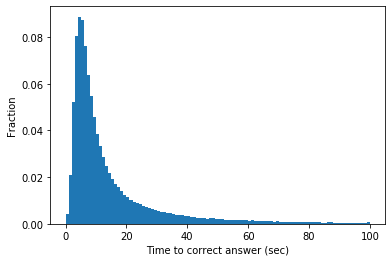

In [8]:
%matplotlib inline
hist = plt.hist(np.array(csd.dropna()),bins=100,density=True,log=False,range=(0,100))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

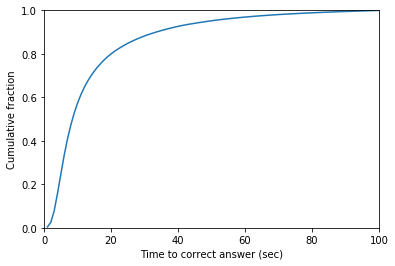

In [9]:
counts, bins = hist[0], hist[1]
cdf = np.cumsum(counts)
plt.plot(bins[1::], cdf)
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Cumulative fraction')
plt.axis((0,100,0,1.0))
plt.show()

The histogram shows visually what mere statistics hints at. The distribution of students is heavily weighted towards those who are solving problems in under 20 seconds. The cumulative distribution function (CDF) shows that roughly 80% of successful students solve the problem within 20 seconds. After 40 seconds, 90% of successful students have finished the problem. Almost no students take longer than 80 seconds.

### Completion time by problem

OK, let's ask a slightly harder question: how are students doing problem by problem? The answer will take several parts.

First, let's get the number of unique problems

In [10]:
# The unique identifier for each problem is the 'Problem Name'
problems = traindata['Problem Name']

In [11]:
# Get just the uniques
problems = np.unique(problems)
print('Number of unique problems: ', len(problems))

Number of unique problems:  1021


Then, let's compute which problems need the largest time on average.

In [12]:
pmedian_times = {}
for p in problems:
    pmedian_times[p] = traindata[traindata['Problem Name'] == p]['Correct Step Duration (sec)'].median()

In [13]:
import operator

sorted_times = sorted(pmedian_times.items(), key=operator.itemgetter(1), reverse=True)

print("The hardest top-5 problem and its average correct duration (sec).")
print(sorted_times[:5])

print("The earliest top-5 problem and its average correct duration (sec).")
print(sorted_times[len(sorted_times)-5:])

Statistical results of problem difficulty

/Users/zhengyuting/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/zhengyuting/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


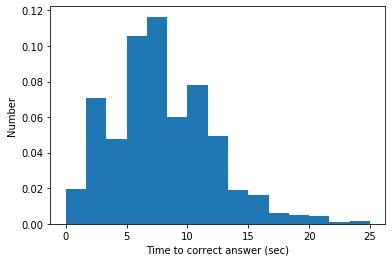

In [16]:
hist = plt.hist(np.array(list(pmedian_times.values())),bins=15,density=True,log=False,range=(0,25))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Number')
plt.show()

If we take the time to correct answer as the difficulty of a problem, the histogram shows visually the difficulties of all the problems. 

### Conclusion
There are many other interesting characteristic in this dataset.
Like, 
* After some practices, students may become better at solving problems.
* Same problem step for different students may request different knowledge components. Or for some problems, there is only one correct knowledge components

These may be some things you need to take consider into for the feature engineering part. We leave them for you to explore deeper.

### Explore time

In [67]:
# The unique identifier for each problem is the 'Problem Name'
problems = traindata['Problem Name']
# Get just the uniques
problems = np.unique(problems)
print('Number of unique problems: ', len(problems))

pmedian_times = {}
for p in problems:
    pmedian_times[p] = traindata[(traindata['Problem Name'] == p) & (traindata['Correct First Attempt'] == 1)]['Step Duration (sec)'].median()

wa_pmedian_times = {}
for p in problems:
    wa_pmedian_times[p] = traindata[(traindata['Problem Name'] == p) & (traindata['Correct First Attempt'] == 0)]['Step Duration (sec)'].median()

Number of unique problems:  1021


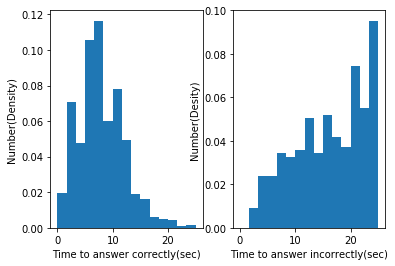

In [68]:
plt.subplot(1,2,1)
hist = plt.hist(np.array(list(pmedian_times.values())),bins=15,density=True,log=False,range=(0,25))
plt.xlabel('Time to answer correctly(sec)')
plt.ylabel('Number(Density)')
plt.subplot(1,2,2)
hist = plt.hist(np.array(list(wa_pmedian_times.values())),bins=15,density=True,log=False,range=(0,25))
plt.xlabel('Time to answer incorrectly(sec)')
plt.ylabel('Number(Desity)')
plt.show()

### explore KC

In [37]:
compound_KCs = set(traindata['KC(Default)'])
max_compound_KCs = 0
for kcs in compound_KCs:
    if pd.isnull(kcs):
        continue
    max_compound_KCs = max(kcs.count('~~') + 1, max_compound_KCs)
print(max_compound_KCs)

5


In [38]:
tmp = {}
tmp[0] = [0,0]
tmp[1] = [0,0]
tmp[2] = [0,0]
tmp[3] = [0,0]
tmp[4] = [0,0]
tmp[5] = [0,0]

In [39]:
for _, row in traindata.iterrows():
    if pd.isnull(row['KC(Default)']):
        if row['Correct First Attempt']:
            tmp[0][0] += 1
        tmp[0][1] += 1
    else:
        if row['Correct First Attempt']:
            tmp[(row['KC(Default)'].count('~~')+1)][0] += 1
        tmp[(row['KC(Default)'].count('~~')+1)][1] += 1

In [40]:
axis_y = []
for i in tmp.keys():
    axis_y.append(tmp[i][0]/tmp[i][1])
    print('when KC number is {}, the correct first attempt rate is {}, which is {} / {}.'.format(i, tmp[i][0]/tmp[i][1], tmp[i][0], tmp[i][1])) 

when KC number is 0, the correct first attempt rate is 0.8150367057632267, which is 48295 / 59255.
when KC number is 1, the correct first attempt rate is 0.8053092916774393, which is 96559 / 119903.
when KC number is 2, the correct first attempt rate is 0.7997563224446786, which is 24287 / 30368.
when KC number is 3, the correct first attempt rate is 0.5402350008901549, which is 12138 / 22468.
when KC number is 4, the correct first attempt rate is 0.6431535269709544, which is 465 / 723.
when KC number is 5, the correct first attempt rate is 0.5185185185185185, which is 14 / 27.


In [61]:
compound_KCs = set(traindata['KC(Default)'])
KC ={}
KC_correct_rate = {}
for kcs in compound_KCs:
    if pd.isnull(kcs):
        continue
    for kc in kcs.split('~~'):
        KC[kc] = [0,0]
print(len(KC))
for _, row in traindata.iterrows():
    if pd.isnull(row['KC(Default)']):
        continue
    else:
        for kc in row['KC(Default)'].split('~~'):
            if row['Correct First Attempt']:
                KC[kc][0] += 1
            KC[kc][1] += 1
KC_correct_rate = {i:KC[i][0]/KC[i][1] for i in KC.keys()}
mean_KCFAR =  np.mean(list(KC_correct_rate.values()))
var_KCFAR =  np.var(list(KC_correct_rate.values()))
print(mean_KCFAR, var_KCFAR)

110
0.6224779565183473 0.047274513246457546


### explore Person 

In [64]:
student_id = traindata['Anon Student Id']
student_id = np.unique(student_id)
print('Number of unique student: ', len(student_id))

ex = {}
for p in student_id:
    ex[p] = traindata[(traindata['Anon Student Id'] == p)]['Correct First Attempt'].mean()
ex

Number of unique student:  174


{'02i5jCrfQK': 0.777126540426811,
 '0GlR30c2Mt': 0.7506134969325153,
 '0KS4yy9G96': 0.8318335208098988,
 '0nF0z1401O': 0.7986798679867987,
 '12M70dm49w': 0.7751493428912783,
 '162lfGskK2': 0.828125,
 '16zN4n2fFO': 0.8068571428571428,
 '183ppvOXp8': 0.8537782139352306,
 '1bJbgQ32E3': 0.7335038363171356,
 '1k3GIfwBw6': 0.8444444444444444,
 '23T7Up1oQ6': 0.875,
 '242fhbKRf9': 0.7093660890546173,
 '276487SwvF': 0.7806513409961686,
 '29U6L12O3k': 0.6891891891891891,
 '2kb387yOiG': 0.7867892976588629,
 '2x0Z9q6jD0': 0.6624365482233503,
 '3008m5T78s': 0.6294363256784968,
 '3C1dH8H8v3': 0.8325639949643306,
 '3Whv9UbPsR': 0.6455696202531646,
 '3k85qY4Y2B': 0.6987654320987654,
 '42FRuGgL06': 0.8666666666666667,
 '443ptPwtPd': 0.7863501483679525,
 '448d2Kv3hw': 0.8469135802469135,
 '45euP7C062': 0.8043184885290149,
 '45oTz6NVkr': 0.5476190476190477,
 '46K8Eq75fJ': 0.6220472440944882,
 '4EUt9uDfjG': 0.5833333333333334,
 '4ajdr1a4Kc': 0.7616438356164383,
 '517LN52NOL': 0.7973568281938326,
 '52vEY7f